In [65]:
import pandas as pd
import numpy as np

from main import set_ab_test 
from main import validate_ab_test_data
from main import test_hypothesis_relational
from main import test_hypothesis_continuous
from main import print_statistical_report
from main import save_report_to_html

In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
EXPERIMENT_NAME = 'ab_price_discount'

exp_df = pd.DataFrame({
    'user_id': [1, 1, 2, 3, 3, 4, 5, 6],
    'dt': ['2021-01-01', '2021-01-02', '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-02', '2021-01-05', '2021-01-01'],
    'group': [2, 1, 1, 2, 2, 2, 1, 3],
    'payment': [np.nan, 100, np.nan, 110, np.nan, 50, np.nan, 130],
    'clicks': [0, 11, 2, 9, 1, 4, 0, 15]
})

In [68]:
exp_df.describe()

,user_id,group,payment,clicks
count,8.000000,8.000000,4.000000,8.000000
mean,3.125000,1.750000,97.500000,5.250000
std,1.807722,0.707107,34.034296,5.700877
min,1.000000,1.000000,50.000000,0.000000
25%,1.750000,1.000000,87.500000,0.750000
50%,3.000000,2.000000,105.000000,3.000000
75%,4.250000,2.000000,115.000000,9.500000
max,6.000000,3.000000,130.000000,15.000000


In [69]:
m = set_ab_test(
    ab_test_name=EXPERIMENT_NAME, 
    dataframe=exp_df, 
    abgroup_col='group', 
    date_col='dt', 
    uniq_id_col='user_id',
    control_group_name=1,
    significance_level=0.95
)

In [70]:
validate_ab_test_data(EXPERIMENT_NAME)

group                   1           2      3
user_id count    3.000000    4.000000    1.0
        mean     2.666667    2.750000    6.0
        std      2.081666    1.258306    NaN
        min      1.000000    1.000000    6.0
        25%      1.500000    2.500000    6.0
        50%      2.000000    3.000000    6.0
        75%      3.500000    3.250000    6.0
        max      5.000000    4.000000    6.0
clicks  count    3.000000    4.000000    1.0
        mean     4.333333    3.500000   15.0
        std      5.859465    4.041452    NaN
        min      0.000000    0.000000   15.0
        25%      1.000000    0.750000   15.0
        50%      2.000000    2.500000   15.0
        75%      6.500000    5.250000   15.0
        max     11.000000    9.000000   15.0
payment count    3.000000    4.000000    1.0
        mean    33.333333   40.000000  130.0
        std     57.735027   52.281290    NaN
        min      0.000000    0.000000  130.0
        25%      0.000000    0.000000  130.0
        50%      0.000000   25.000000  130.0
        75%     50.000000   65.000000  130.0
        max    100.000000  110.000000  130.0

,group,user_id
0,1,5
1,2,1


'test_hypothesis_relational'

,group,dt,payment,user_id,metric
0,1,2021-01-01,0.0,1,0.0
1,1,2021-01-02,1.0,1,1.0
2,1,2021-01-05,0.0,1,0.0
3,2,2021-01-01,0.0,1,0.0
4,2,2021-01-02,1.0,1,1.0
5,2,2021-01-03,0.0,1,0.0
6,3,2021-01-01,1.0,1,1.0


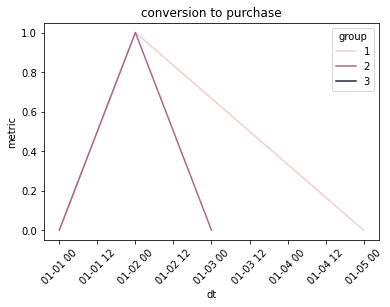

"zero trials or successes, hypothesis won't be tested in groups 1-2"

'successes in control = 0.0'

'trials in control = 1'

'successes in test = 0.0'

'trials in test = 1'

"zero trials or successes, hypothesis won't be tested in groups 1-3"

'successes in control = 0.0'

'trials in control = 1'

'successes in test = 1.0'

'trials in test = 1'

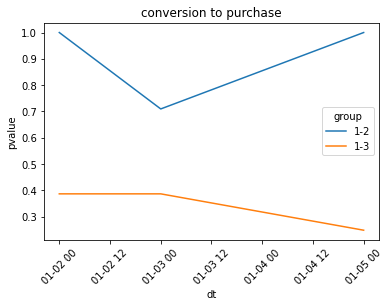

In [71]:
test_hypothesis_relational(
    EXPERIMENT_NAME,
    nominator='payment',
    denominator='user_id',
    stat_test='chisquare', # ztest
    description='conversion to purchase',
    uniq_id_rel=True,
    significance_level=0.95
)

'test_hypothesis_relational'

,group,dt,clicks,user_id,metric
0,1,2021-01-01,2,2,1.000000
1,1,2021-01-02,11,1,11.000000
2,1,2021-01-05,0,5,0.000000
3,2,2021-01-01,0,1,0.000000
4,2,2021-01-02,13,7,1.857143
5,2,2021-01-03,1,3,0.333333
6,3,2021-01-01,15,6,2.500000


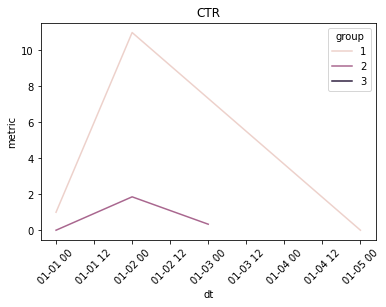

"zero trials or successes, hypothesis won't be tested in groups 1-2"

'successes in control = 2'

'trials in control = 2'

'successes in test = 0'

'trials in test = 1'

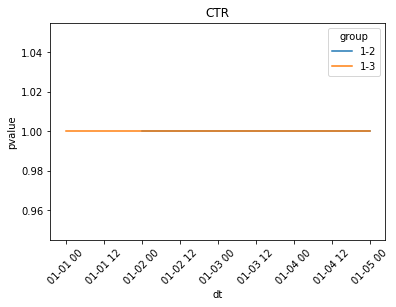

In [72]:
test_hypothesis_relational(
    EXPERIMENT_NAME,
    nominator='clicks',
    denominator='user_id',
    stat_test='chisquare', # ztest
    description='CTR',
    uniq_id_rel=False,
    significance_level=0.05
)

'test_hypothesis_continuous'

,group,metric
0,1,33.333333
1,2,40.000000
2,3,130.000000


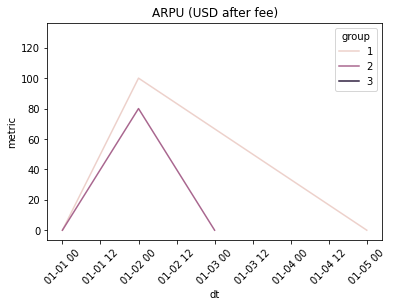

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-2'

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-3'

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-3'

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-3'

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-3'

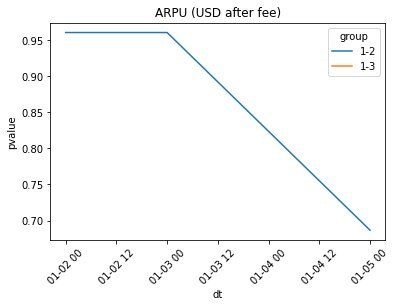

'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-3'

In [73]:
test_hypothesis_continuous(
    EXPERIMENT_NAME,
    value='payment',
    stat_test='ttest_welsh',
    description='ARPU (USD after fee)'
)

In [74]:
print_statistical_report(EXPERIMENT_NAME)

,1,2,3,group 1-2 sign.,group 1-3 sign.
metrics,,,,,
conversion to purchase,0.333,0.333 (+0.00%),1.0 (+200.00%),- (H0 accepted),- (H0 accepted)
CTR,1.625,1.273 (-21.68%),2.5 (+53.85%),- (H0 accepted),- (H0 accepted)
ARPU (USD after fee),33.333,40.0 (+20.00%),NaN,- (H0 accepted),NaN


'Holm miltiple testing correction is applied'

,pval. 1-2,pval. 1-3,corrected pval. 1-2,corrected pval. 1-3
conversion to purchase,1.000,0.248,1.0,1.0
CTR,1.000,1.000,1.0,1.0
ARPU (USD after fee),0.882,NaN,1.0,NaN


In [75]:
# save_report_to_html(EXPERIMENT_NAME)